In [1]:
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import networkx as nx

from graphenv.examples.tsp.graph_utils import make_complete_planar_graph, plot_network

%matplotlib inline
%load_ext autoreload

In [2]:
%autoreload 2
from graphenv.examples.tsp.tsp_env import TSPEnv

# Create and visualize simple network

In [3]:
N = 5
# G = nx.cycle_graph(N)
G = make_complete_planar_graph(N, seed=2)

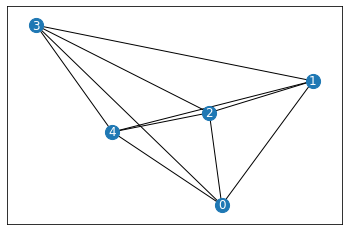

In [4]:
_ = plot_network(G, path=None)

# Solve TSP using nx heuristics

TSP solution [0, 2, 3, 1, 4, 0]


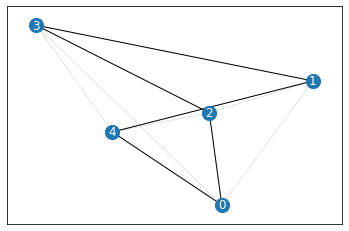

In [36]:
tsp = nx.approximation.traveling_salesman_problem
path = tsp(G, cycle=True)
print("TSP solution", path)

_ = plot_network(G, path=path)

# Demo of gym env with random actions

In [7]:
config = {"G": G}
env = TSPEnv(config)
env.__dict__

{'state': <graphenv.examples.tsp.tsp_state.TSPState at 0x1930ade20>,
 '_action_mask_key': 'action_mask',
 '_vertex_observation_key': 'vertex_observations',
 'max_num_children': 5,
 'observation_space': Dict(action_mask:MultiBinary(6), vertex_observations:Dict(node_obs:Box([[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]], [[4.]
  [4.]
  [4.]
  [4.]
  [4.]
  [4.]], (6, 1), float64))),
 'action_space': Discrete(5)}

In [37]:
def sampler(mask):
    choices = list(range(len([i for i in mask if i])))
    return random.choice(choices)

obs = env.reset()
done = False
reward = 0.
while not done:
    action = sampler(obs["action_mask"])
    obs, rew, done, _ = env.step(action)
    print(action, rew, done)

0 -0.42488296534900866 False
2 -0.30148715858147346 False
0 -0.13639966186766653 False
0 -0.36058127454416256 False
0 -0.6368509007229414 True


Random path [0, 2, 3, 1, 4, 0]


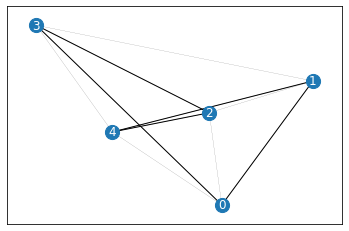

In [38]:
print("Random path", path)
_ = plot_network(G, path=env.state.tour)